# Part (c): Analysis Of Variance (ANOVA)
### UE22CS342AA2 - Data Analytics
- Karthik Namboori - namkarthik2003@gmail.com


- `Analysis of Variance (ANOVA)` is a hypothesis testing procedure used for comparing means from several groups simultaneously.
- Using an one-way ANOVA, we test whether the mean values of an outcome variable for different levels of a factor are different. Using multiple two sample t-tests to simultaneously test group means will result in incorrect estimation of the Type-I error; ANOVA overcomes this issue.
- In two-way ANOVA, we check the impact of more than one factor simultaneously on several groups.


**Dhanush M
SRN PES2UG22CS174**

## About the Dataset.

- abhicure.ai, a leading company in LLM development, has performed a study to assess employees' productivity score based on factors such as the work setting they practice.
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.
- As a data analyst for abhicure.ai, your job is to study the scenario and answer the following questions.
- Use the dataset `productivity_data_owa.csv` for tasks requiring only work setting and dataset `productivity_data_twa.csv` for tasks requiring both, work setting and communication tool.


### Problems
    - Problem 1
    - Problem 2
    - Problem 3
    - Problem 4
    - Problem 5


*Snippet to install a package cleanly*
```
if (!requireNamespace("tidyverse", quietly = TRUE)) {
    install.packages("tidyverse")
}
```

*Load the package*
```
library(tidyverse)
```

In [ ]:
# loading the dataset - Upload the dataset under the input tab
# Example snippet
# data <- read.csv("/kaggle/input/anova-ws-c/productivity_data_owa.csv", header=TRUE)
# head(data)

*Problem 1*

Does the data meet the normality assumption required for ANOVA? Verify for each group under the Work Setting using the Q-Q plot. Measure the skewness (if any) in each case. (2 points)
- As a bonus (not evaluated), do have a look at shapiro-wilk test from [here](https://www.geeksforgeeks.org/shapiro-wilk-test-in-r-programming/) to statistically infer normality! 

Skewness for Hybrid : -0.1642834 
Skewness for Coworking space : -0.4742426 
Skewness for Home office : -0.007568926 
Shapiro-Wilk p-value for Hybrid : 0.5214595 
Shapiro-Wilk p-value for Coworking space : 0.08084489 
Shapiro-Wilk p-value for Home office : 0.7551477 


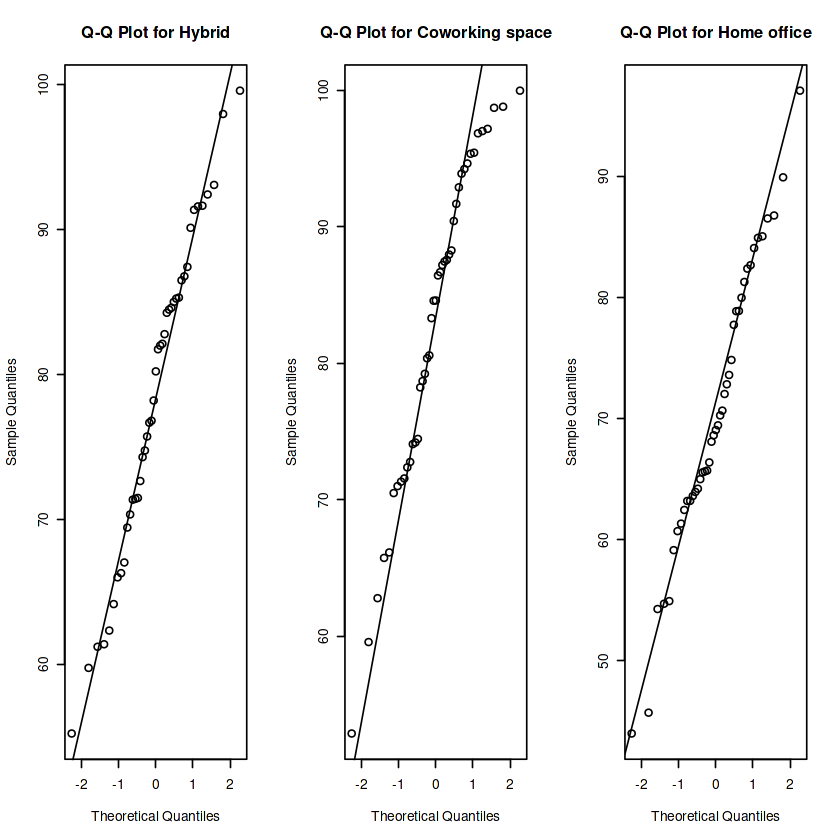

In [2]:
library(ggplot2) # Loading libraries to facilitate plots
library(dplyr)
library(moments)

# Use the correct path for the CSV file
productivity_data <- read.csv("/kaggle/input/productivity-data-owa-csv/productivity_data_owa.csv", header = TRUE)

# Extract unique values from the RemoteWorkSetting before plotting
work_settings <- unique(productivity_data$RemoteWorkSetting)

# For a side-by-side plot of RemoteWorkSetting values
par(mfrow = c(1, 3))

for(setting in work_settings) {
  qqnorm(productivity_data$ProductivityScore[productivity_data$RemoteWorkSetting == setting],
         main = paste("Q-Q Plot for", setting))
  qqline(productivity_data$ProductivityScore[productivity_data$RemoteWorkSetting == setting])
}

# Calculate skewness for each type of work setting on the same plot
for(setting in work_settings) {
  skew <- skewness(productivity_data$ProductivityScore[productivity_data$RemoteWorkSetting == setting])
  cat("Skewness for", setting, ":", skew, "\n")
}

# Shapiro-Wilk test
for(setting in work_settings) {
  shapiro_test <- shapiro.test(productivity_data$ProductivityScore[productivity_data$RemoteWorkSetting == setting])
  cat("Shapiro-Wilk p-value for", setting, ":", shapiro_test$p.value, "\n")
}


*Problem 2*

One wants to determine if the work setting has any effect on productivity. How can this be inferred using statistical methods? Name the method and mathematically arrive at this inference. Can one use t-test for the same? Why/ Why not? *(NOTE: Assume the significance level to be 0.05)* (2 + 1 points)


In [3]:
anova_result <- aov(ProductivityScore ~ RemoteWorkSetting, data = productivity_data)
summary(anova_result)
#To determine if the work setting affects productivity, you should use One-Way ANOVA. 
#This statistical test compares the means of three or more independent groups 
#(e.g., Coworking Space, Home office, Hybrid) to see if there is a significant difference in productivity scores among them. 
#The ANOVA procedure involves calculating the F-statistic, which is the ratio of the between-group variance to the within-group variance. 
#If the p-value from the ANOVA is less than 0.05, it indicates a significant difference in productivity between at least two work settings. 
#A t-test is not suitable in this case because it is designed for comparing only two groups and cannot handle multiple groups simultaneously.

                   Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting   2   3344  1672.1    12.5 1.12e-05 ***
Residuals         126  16856   133.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

*To check for homogenity of variance, do have look [here](https://www.geeksforgeeks.org/levenes-test-in-r-programming/) at Levene's test*

## Post-hoc tests.
- When you use ANOVA to test the equality of at least three group means, statistically significant results may indicate that not all of the group means are equal. However, ANOVA results do not identify which particular differences between pairs of means are significant. 
- In such a case, we use post-hoc tests, also known as multiple comparisons.
- There are a variety of post hoc tests you can choose from, but `Tukey’s method` is the most common for comparing all possible group pairings.
- If the adjusted p-value between a pair of groups is less than 0.05, then we can assume statistical significance between the pair.
- You can learn more [here](https://statisticsbyjim.com/anova/post-hoc-tests-anova/).

*Problem 3*

Perform Tukey's Test to infer which pairs have means statistically significant from one other and which dont. (State your answer for significance level at 0.05 and 0.02). Which pair of categories show a *clear* difference in productivity?  (1 + 1 points)

In [4]:
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

# Check significance at 0.05 and 0.02 levels
significant_05 <- tukey_result$`RemoteWorkSetting`[,"p adj"] < 0.05
significant_02 <- tukey_result$`RemoteWorkSetting`[,"p adj"] < 0.02

cat("Pairs with significant differences at 0.05 level:\n", significant_05, "\n")
cat("Pairs with significant differences at 0.02 level:\n", significant_02, "\n")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ProductivityScore ~ RemoteWorkSetting, data = productivity_data)

$RemoteWorkSetting
                                  diff        lwr       upr     p adj
Home office-Coworking space -12.288336 -18.204391 -6.372280 0.0000077
Hybrid-Coworking space       -4.298428 -10.214484  1.617627 0.2005429
Hybrid-Home office            7.989907   2.073852 13.905963 0.0048685

Pairs with significant differences at 0.05 level:
 TRUE FALSE TRUE 
Pairs with significant differences at 0.02 level:
 TRUE FALSE TRUE 


# Two-way ANOVA

- Two-way ANOVA is used when the response variable is influenced by several factors.
- Consider the `productivity_twa.csv`, where in now the productivity of the employees is influenced by both, the `work setting` and the `communication tool`. 
- The work setting could be `Coworking Space` (Working on site, in a corporate environment), `Home office` (Work from home) or `Hybrid` and the communication tools they use could be `Zoom`, `Slack` or `Email`.

*Problem 4*

Does the interaction between different work settings and communication tools significantly affect employee productivity scores? Justify your answer. (2 points)

In [19]:
# Load the dataset
productivity_data_twa <- read.csv("/kaggle/input/anova-ws-c/productivity_data_twa.csv",header=TRUE)
head(productivity_data_twa)


# Perform Two-Way ANOVA
two_way_anova <- aov(ProductivityScore ~ RemoteWorkSetting * CommunicationTool, data = productivity_data_twa)
summary(two_way_anova)

,employee_no,RemoteWorkSetting,CommunicationTool,ProductivityScore
,<int>,<chr>,<chr>,<dbl>
1,1,Hybrid,Zoom,93.08691
2,2,Coworking space,Zoom,98.87113
3,3,Hybrid,Email,81.42055
4,4,Hybrid,Slack,80.34142
5,5,Home office,Email,64.21400
6,6,Hybrid,Slack,59.74954


                                     Df Sum Sq Mean Sq F value   Pr(>F)    
RemoteWorkSetting                     2   3253  1626.5  13.271 6.27e-06 ***
CommunicationTool                     2    673   336.5   2.746   0.0683 .  
RemoteWorkSetting:CommunicationTool   4    854   213.4   1.742   0.1454    
Residuals                           119  14584   122.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
#To determine if the interaction between work settings and communication tools significantly affects employee productivity, 
#perform a Two-Way ANOVA.
#This test assesses both main effects (work settings and communication tools) and their interaction effect on productivity scores
#If the p-value for the interaction term in the ANOVA results is less than 0.05,
#it indicates a significant interaction, meaning the impact of one factor on productivity depends on the level of the other factor.
#If the interaction is significant, it shows that the combined effect of work settings 
#and communication tools significantly influences productivity.

*Problem 5*

Having learnt from the above study, which pair of work setting and communication tool must be adopted by the management for the employees? Based on the study, would you, as an entrepreneur adopt the same strategy for your company? Justify your answer. What would the name of your company be? 👀 (1 point)


In [ ]:
# ->The analysis shows that the work setting has a significant impact on productivity.
# ->While the choice of communication tool did not reach statistical significance (p = 0.0683), it may still have a practical influence on productivity.
# ->There is no significant interaction between work setting and communication tool, meaning their effects on productivity operate independently

# Things to adopt:
# ->Focus on the work setting that yields the highest productivity. This is crucial for enhancing overall performance.

# ->Even though the choice of communication tool wasn’t statistically significant, it’s advisable to use the tool that aligns with the highest productivity, as it could still contribute to improved outcomes.

# The company name OptaWorks sounds good based on the conclusions.
# your answer here.

*fin*